In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy import ones
from numpy import zeros
import random
from numpy.random import randn
from matplotlib import pyplot


given_mean = 0.6        #storing the given mean
given_std = 0.2         #storing the given standard deviation  


Using TensorFlow backend.


In [5]:
def real_data(if_print, no_of_samples):
    initial_data = np.random.normal(loc = given_mean, scale = given_std, size =  no_of_samples)     #producing normally distributed samples
    distribution = norm.pdf(initial_data, loc = given_mean, scale = given_std)                     #producing probability density function based on initial data
    X1 = initial_data.reshape(no_of_samples, 1)
    X2 = distribution.reshape(no_of_samples, 1)
    X = np.hstack((X1,X2))         #horizontally stacking data and distribution
    Y = ones((no_of_samples,1))
    return (X,Y)

In [6]:
def define_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(34,input_dim = 2,activation = 'relu'))
    discriminator.add(Dense(1,activation = 'sigmoid'))
    discriminator.summary()
    opt = Adam(learning_rate=0.01)
    discriminator.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])     #Compiling Discrimator
    discriminator.trainable = False                                                               #So that the laayers are frozen during GAN network training
    return discriminator

In [7]:
#No need to compile generator because of not beit fit directly
def define_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(34,input_dim =latent_dim, activation = 'relu'))
    generator.add(Dense(2, activation='linear'))              
    generator.summary()                              
    return generator

In [8]:
def latent_points_generation(latent_dim, no_of_samples):
    x_input = randn(latent_dim*no_of_samples)          #producing points of nornally distributed 
    x_input = x_input.reshape(no_of_samples,latent_dim)
    return x_input

In [9]:
def generate_fake_samples(generator,latent_dim,no_of_samples):
    x_input = latent_points_generation (latent_dim,no_of_samples)
    X = generator.predict(x_input)
    y = zeros((no_of_samples,1))
    return X,y

In [10]:
#Defining and Compiling GAN Network
def define_gan(generator,discriminator):
    gan_network = Sequential()
    gan_network.add(generator)
    gan_network.add(discriminator)
    gan_network.compile(loss ='binary_crossentropy', optimizer ='adam')
    return gan_network

In [14]:
def summarize_performance(generator, discriminator,n=1000):
    X_real, y_real = real_data(1,n)
    X_fake, y_fake = generate_fake_samples(generator,latent_dim,n)
    Real_mean = np.mean(X_real[:,0])
    Real_std = np.std(X_real[:,0])
    Generated_mean = np.mean(X_fake[:,0])
    Generated_std = np.std(X_fake[:,0])
    print("Original mean and standard deviation ", Real_mean, " ", Real_std)

    print("Generated mean and standard deviation ", Generated_mean, " ", Generated_std)
    
    plt.title(label="Red graph for original and blue for generated samples", color="green")
    pyplot.xlabel('Data')
    pyplot.ylabel('Probability Density Function of Data')
    pyplot.scatter(X_real[:, 0], X_real[:, 1], color='red', label ='Original')
    pyplot.scatter(X_fake[:, 0], X_fake[:, 1], color='blue', label ='Generated')
    pyplot.legend()
    pyplot.show()

In [21]:
def train_all(gen, dis, gan, latent_dim, epochs =8001, batch = 128):
    half_batch  = int(batch / 2)
    
    for i in range(epochs):
        print_bool = 0
        ''
        if((i+1)%2000==0):
            print_bool = 1
        
        X_real, y_real = real_data( print_bool, half_batch) 
        X_fake, y_fake = generate_fake_samples( gen, latent_dim, half_batch)
        dis.train_on_batch(X_real,y_real)
        dis.train_on_batch(X_fake,y_fake)
        X_gan = latent_points_generation(latent_dim, batch)
        y_gan = ones((batch,1))
        gan.train_on_batch(X_gan,y_gan)
        if (print_bool==1):
            summarize_performance(gen,dis)        

Discriminator Summary

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 34)                102       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 35        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________

Generator Summary

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 34)                374       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 70        
Total params: 444
Trainable params: 444
Non-trainable params: 0
_________________________________________________________

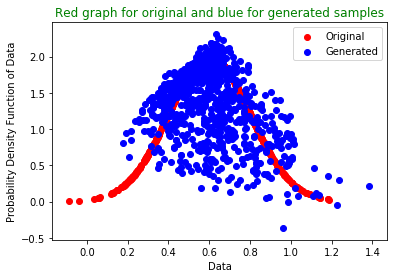

Original mean and standard deviation  0.5984739763964287   0.21206913763695334
Generated mean and standard deviation  0.6215254   0.14365238


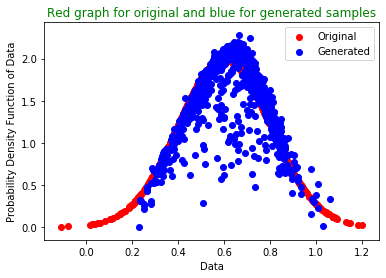

Original mean and standard deviation  0.6077519387333898   0.19599558438989265
Generated mean and standard deviation  0.6077964   0.14867449


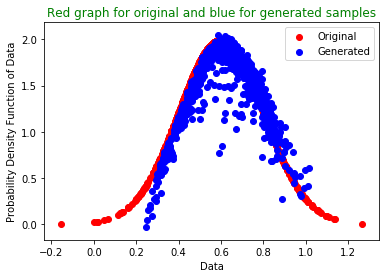

Original mean and standard deviation  0.6015648714388713   0.1979701116227428
Generated mean and standard deviation  0.585322   0.15549074


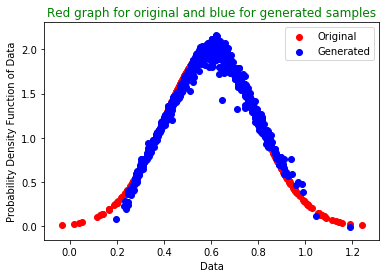

In [22]:
latent_dim = 10
print ("Discriminator Summary\n")
discriminator = define_discriminator()
print("\nGenerator Summary\n")
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train_all(generator, discriminator, gan_model, latent_dim)